In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set()

In [2]:
data_train = pd.read_csv(r'E:\MachineLearning\kaggle\train.csv')

In [3]:
pd.set_option('display.max_columns',None)
data_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Feature having missing values
mean() of missing values using for loop


In [4]:
data_feature_na = [feature for feature in data_train.columns if data_train[feature].isnull().sum() >= 1]

for feature in data_feature_na:
    print(f'{feature} having {np.round(data_train[feature].isnull().mean(), 4)} %')

LotFrontage having 0.1774 %
Alley having 0.9377 %
MasVnrType having 0.0055 %
MasVnrArea having 0.0055 %
BsmtQual having 0.0253 %
BsmtCond having 0.0253 %
BsmtExposure having 0.026 %
BsmtFinType1 having 0.0253 %
BsmtFinType2 having 0.026 %
Electrical having 0.0007 %
FireplaceQu having 0.4726 %
GarageType having 0.0555 %
GarageYrBlt having 0.0555 %
GarageFinish having 0.0555 %
GarageQual having 0.0555 %
GarageCond having 0.0555 %
PoolQC having 0.9952 %
Fence having 0.8075 %
MiscFeature having 0.963 %


# We have to find relationship between missing values and SalePrice
plotting bargraph

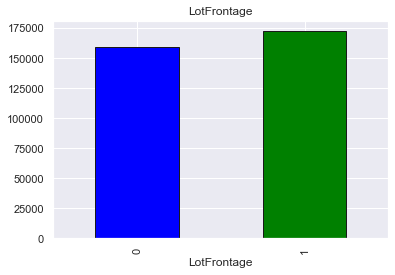

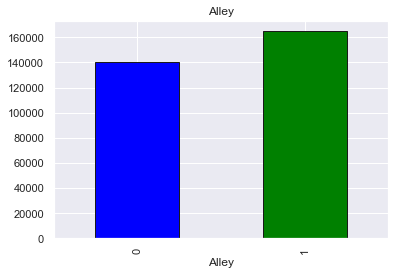

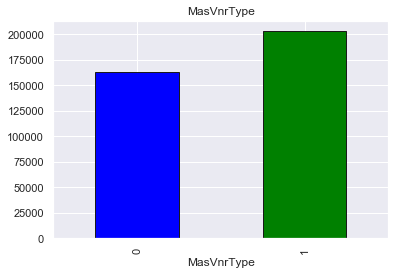

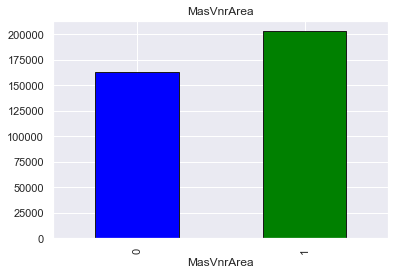

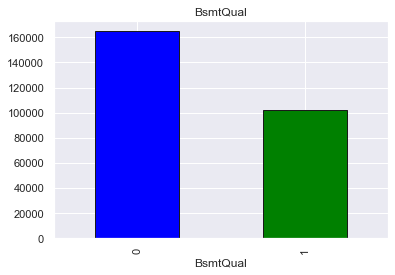

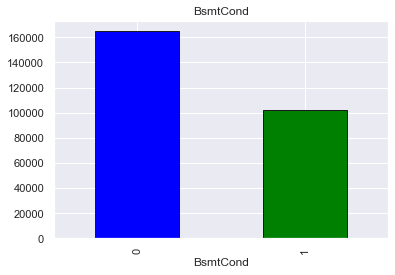

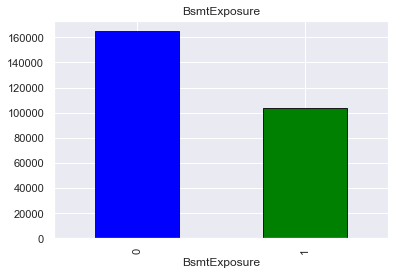

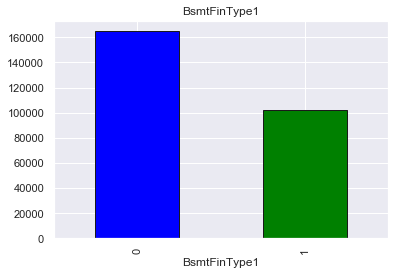

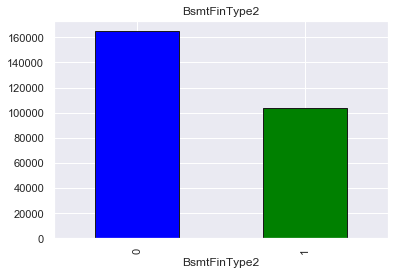

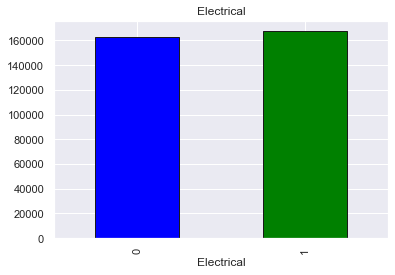

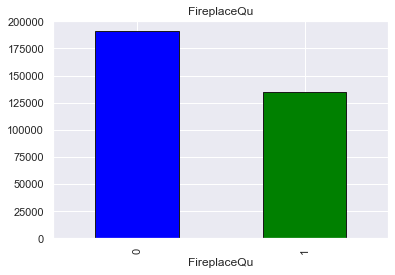

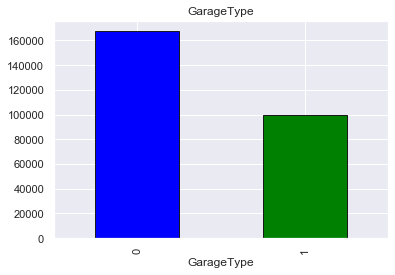

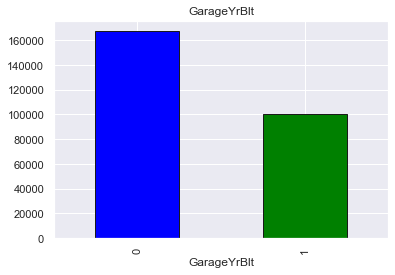

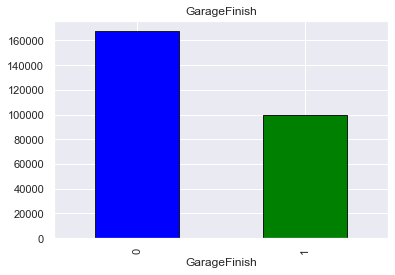

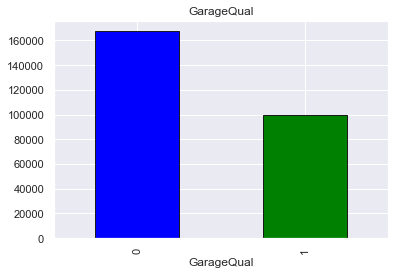

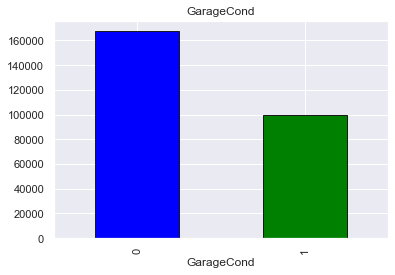

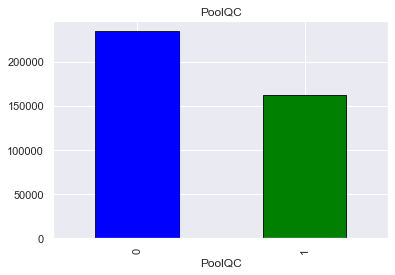

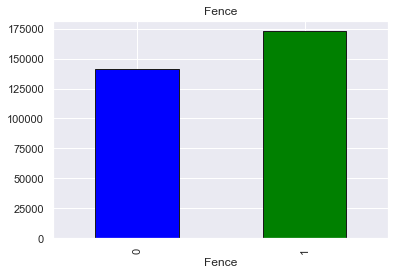

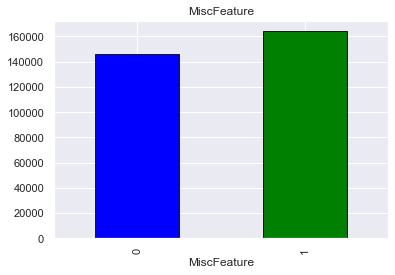

In [5]:

for feature in data_feature_na:
    data = data_train.copy()
    
#     Separating missing values from data and assigning it to 1 
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    
#     Plotting all features with reference to SalePrice
    data.groupby(feature)['SalePrice'].median().plot.bar(color = {'blue', 'green'}, edgecolor = 'k')
    plt.title(feature)
    plt.show()

# Numerical variables

In [6]:
data_numerical = [features for features in data_train.columns if data_train[features].dtypes != 'O']

print('Number of Numerical variable is: ',len(data_numerical))

data_train[data_numerical].head()

Number of Numerical variable is:  38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


# Numerical Feature having DateTime

In [7]:
numerical_year = [feature for feature in data_numerical if 'Yr' in feature or 'Year' in feature]

numerical_year

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

Text(0, 0.5, 'SalePrice')

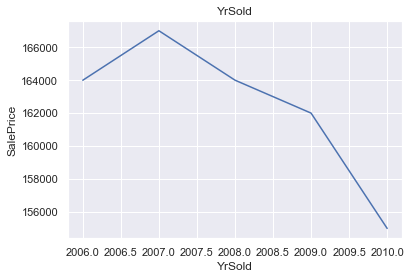

In [8]:
data_train.groupby('YrSold')['SalePrice'].median().plot()
plt.title('YrSold')
plt.ylabel('SalePrice')

In [9]:
numerical_year

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

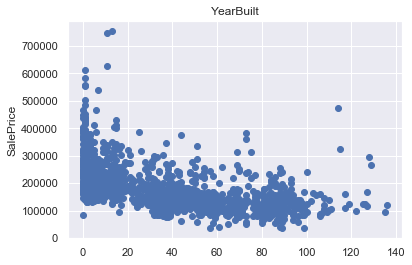

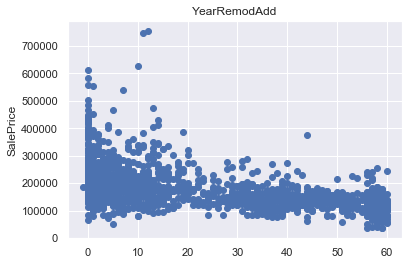

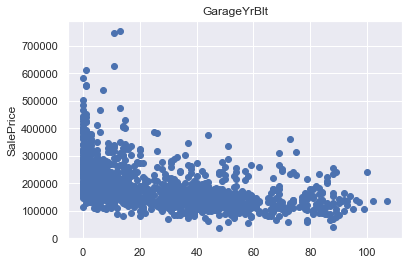

In [10]:
# Comparing numerical year with SalePrice

for features in numerical_year:
    if features != 'YrSold':
        data = data_train.copy()
        data[features] = data['YrSold'] - data[features]
        plt.scatter(data[features], data['SalePrice'])
        plt.title(features)
        plt.ylabel('SalePrice')
        plt.show()

# Features having Discrete Values

In [11]:
data_discrete = [feature for feature in data_numerical if len(data_train[feature].unique()) < 25 and feature not in numerical_year + ['Id']]

data_discrete

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

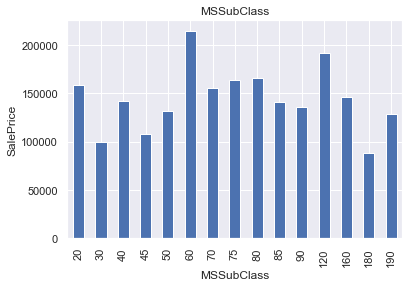

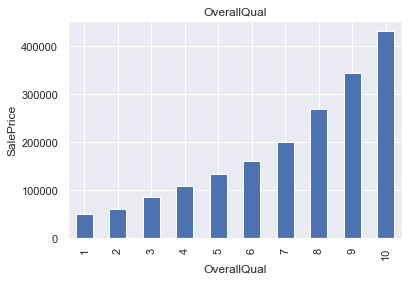

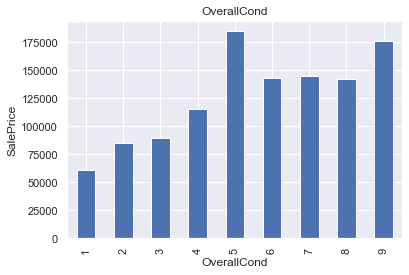

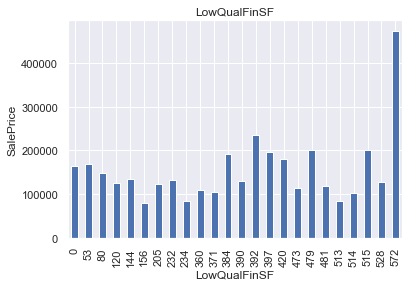

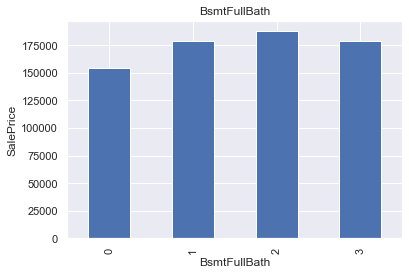

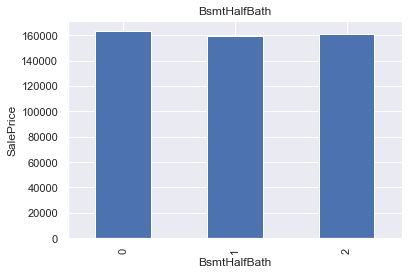

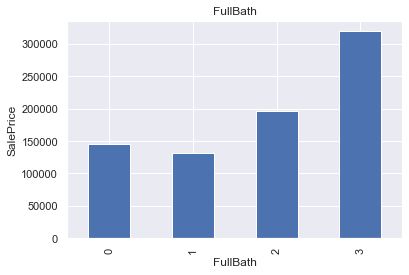

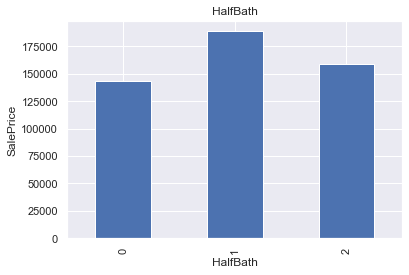

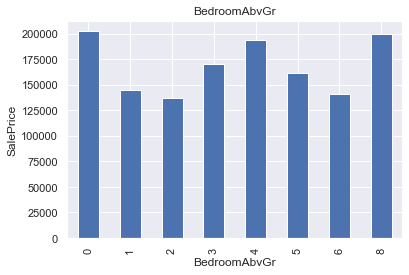

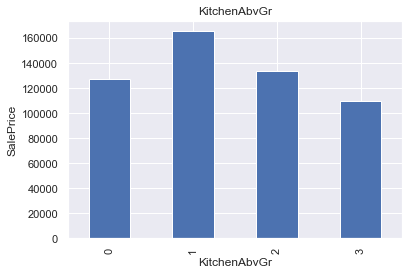

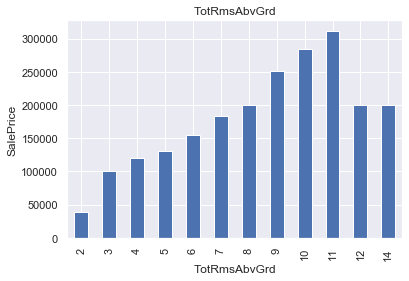

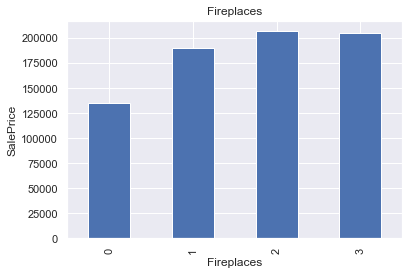

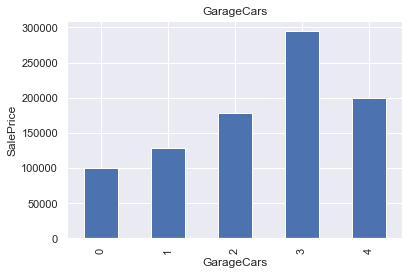

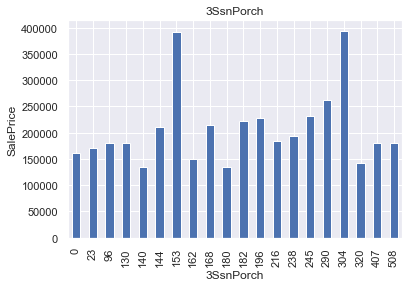

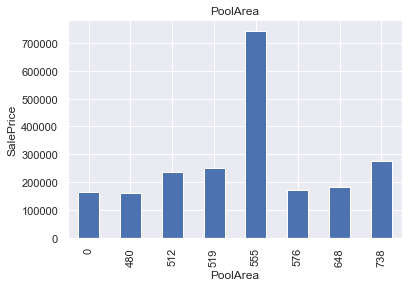

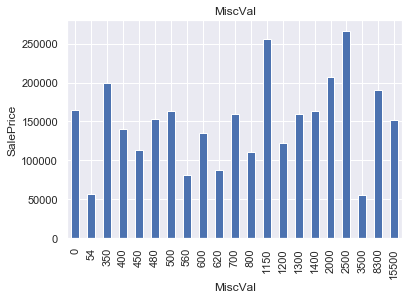

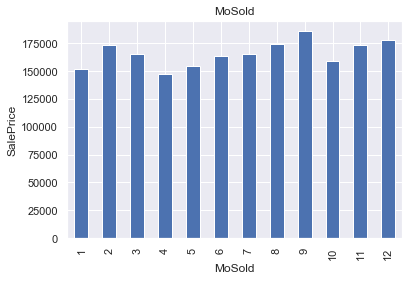

In [12]:
for feature in data_discrete:
    data = data_train.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

# Features having Continuous Values

In [20]:
data_continuous = [feature for feature in data_numerical if feature not in data_discrete + numerical_year + ['Id']]

print(len(data_continuous))
data_continuous

16


['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

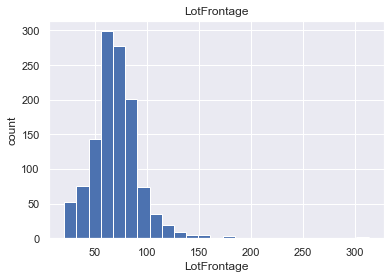

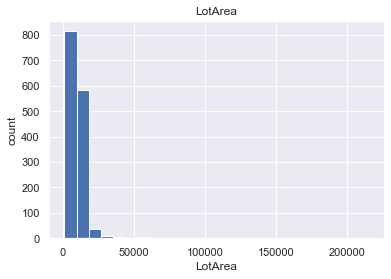

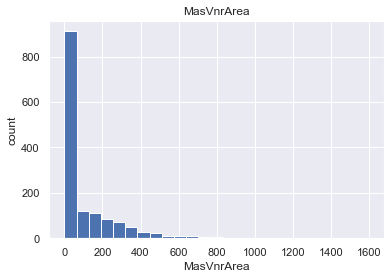

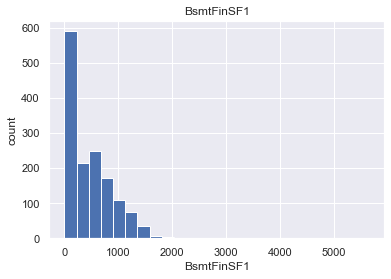

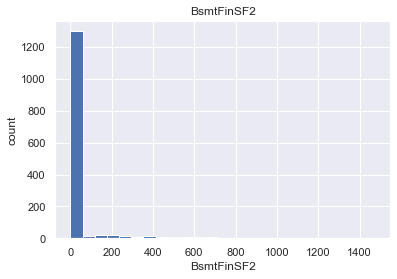

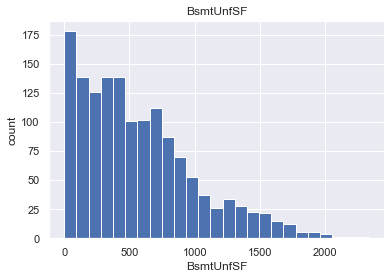

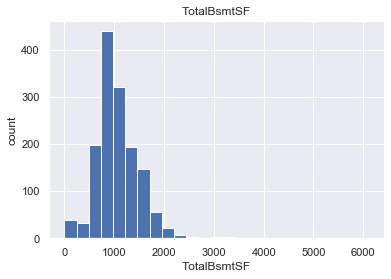

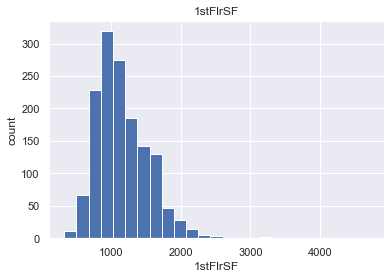

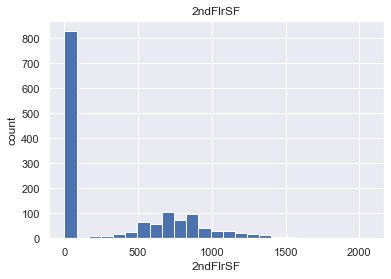

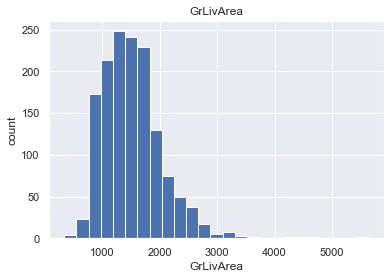

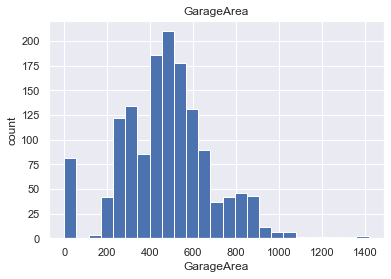

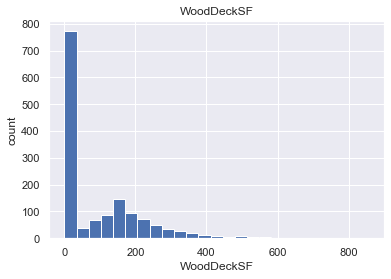

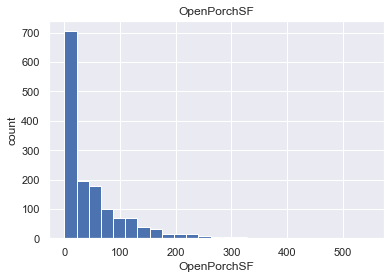

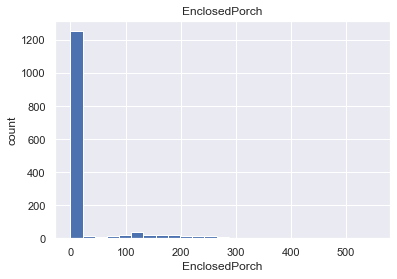

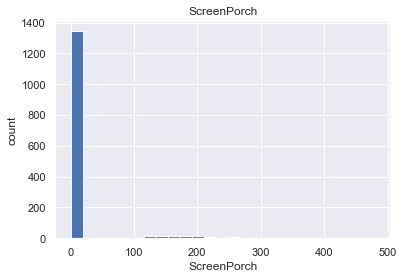

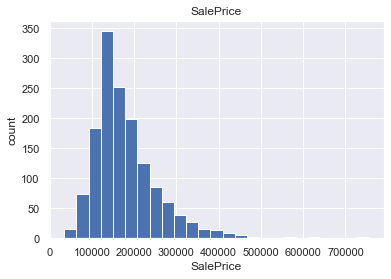

In [25]:
for features in data_continuous:
    data = data_train.copy()
    data[features].hist(bins = 25)
    plt.xlabel(features)
    plt.ylabel('count')
    plt.title(features)
    plt.show()

### Skewness
Since the data_continuous has skewness, we have to convert it into logarithmic.

In [26]:
data_continuous

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

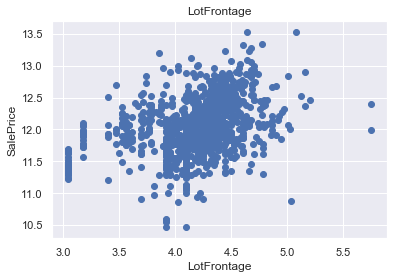

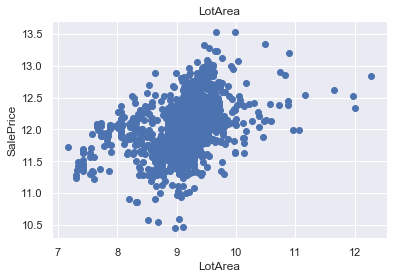

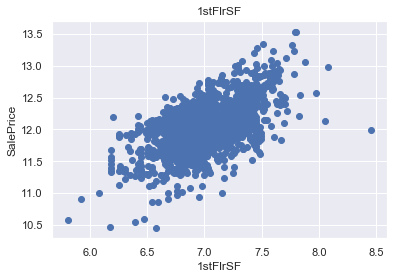

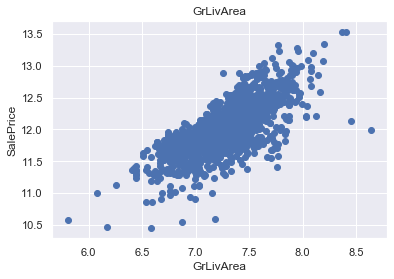

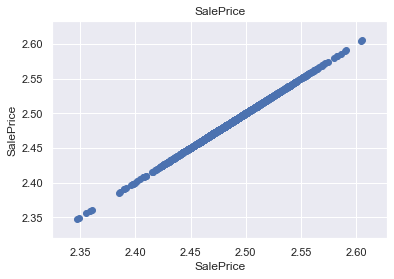

In [30]:
# Logarithmic Transformation

for features in data_continuous:
    data = data_train.copy()
    if 0 in data[features].unique():
        pass
    else:
        data[features] = np.log(data[features])
        data['SalePrice'] = np.log(data['SalePrice'])
        plt.scatter(data[features], data['SalePrice'])
        plt.xlabel(features)
        plt.ylabel('SalePrice')
        plt.title(features)
        plt.show()

# Outliers
Very high or very Low Range of points

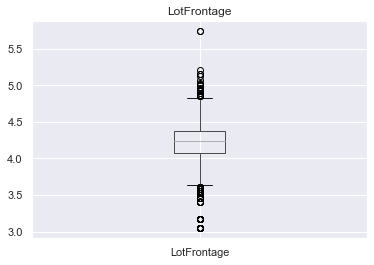

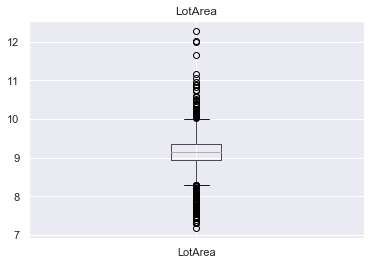

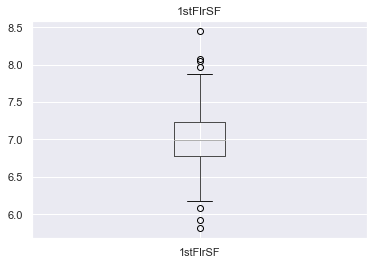

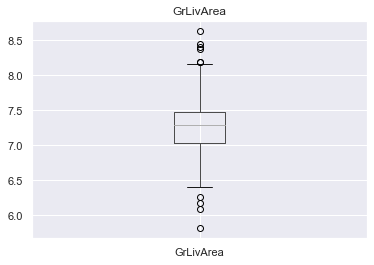

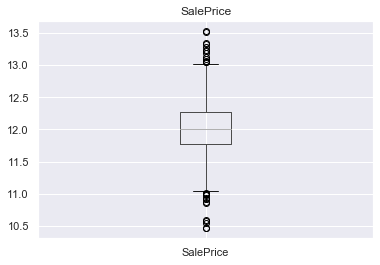

In [38]:
# Only applicable to Numerical values

for features in data_continuous:
    data = data_train.copy()
    if 0 in data[features].unique():
        pass
    else:
        data[features] = np.log(data[features])
        data.boxplot(column = features)
        plt.title(features)
        plt.show()

# Categorical Features

In [39]:
# Getting all categorical feature from dataset

categorical_feature = [feature for feature in data_train.columns if data_train[feature].dtypes == 'O']
categorical_feature

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [41]:
# Getting No. of unique items in Particular Feature
for feature in categorical_feature:
    print('{} has {} unique items'.format(feature, len(data_train[feature].unique())))

MSZoning has 5 unique items
Street has 2 unique items
Alley has 3 unique items
LotShape has 4 unique items
LandContour has 4 unique items
Utilities has 2 unique items
LotConfig has 5 unique items
LandSlope has 3 unique items
Neighborhood has 25 unique items
Condition1 has 9 unique items
Condition2 has 8 unique items
BldgType has 5 unique items
HouseStyle has 8 unique items
RoofStyle has 6 unique items
RoofMatl has 8 unique items
Exterior1st has 15 unique items
Exterior2nd has 16 unique items
MasVnrType has 5 unique items
ExterQual has 4 unique items
ExterCond has 5 unique items
Foundation has 6 unique items
BsmtQual has 5 unique items
BsmtCond has 5 unique items
BsmtExposure has 5 unique items
BsmtFinType1 has 7 unique items
BsmtFinType2 has 7 unique items
Heating has 6 unique items
HeatingQC has 5 unique items
CentralAir has 2 unique items
Electrical has 6 unique items
KitchenQual has 4 unique items
Functional has 7 unique items
FireplaceQu has 6 unique items
GarageType has 7 unique i